<a href="https://colab.research.google.com/github/purnaloke/data-science-projects/blob/main/Time_Series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting temperatures using ARIMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Importing the dataset and converting it into weekly data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/dataset for ARIMA.csv")

# Convert the 'Date' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set the 'Date' column as the index
df.set_index('time', inplace=True)

# Resample the data to monthly frequency and sum the values for each month
weekly_data = df.resample('W').mean()

# Reset the index to make 'Date' a column again
weekly_data.reset_index(inplace=True)

# Print the resulting DataFrame
print(weekly_data)

# print(df)

<ipython-input-4-cf7ff217e27b>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['time'] = pd.to_datetime(df['time'])


           time       tavg       tmin       tmax      prcp
0    1990-01-07  28.471429  24.800000  33.642857  0.071429
1    1990-01-14  26.300000  21.740000  31.600000  1.300000
2    1990-01-21  23.271429  17.450000  30.857143  0.000000
3    1990-01-28  24.157143  19.614286  29.914286  0.000000
4    1990-02-04  25.228571  21.616667  31.133333  0.000000
...         ...        ...        ...        ...       ...
1714 2022-11-13  29.200000  27.200000  33.000000  0.300000
1715 2022-11-20        NaN        NaN        NaN       NaN
1716 2022-11-27        NaN        NaN        NaN       NaN
1717 2022-12-04  26.925000  23.125000  31.825000  0.925000
1718 2022-12-11  30.033333  25.866667  35.066667  7.733333

[1719 rows x 5 columns]


## Plotting the data

<Axes: >

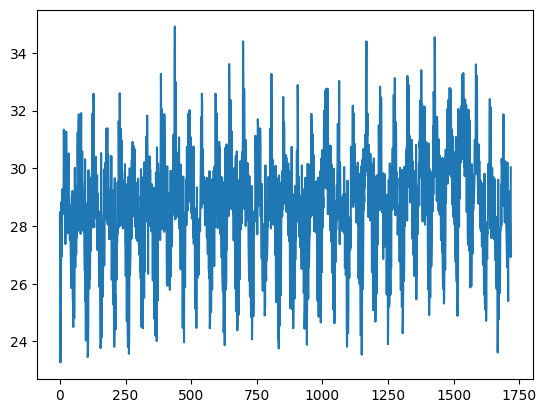

In [ ]:
temp = weekly_data["tavg"]
temp=temp.dropna()
temp.plot()


## Plotting the ACF

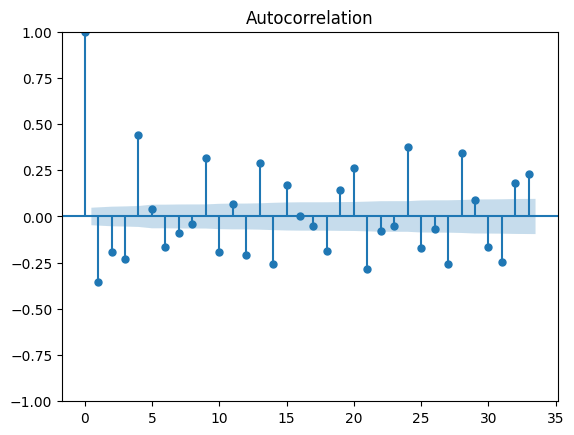

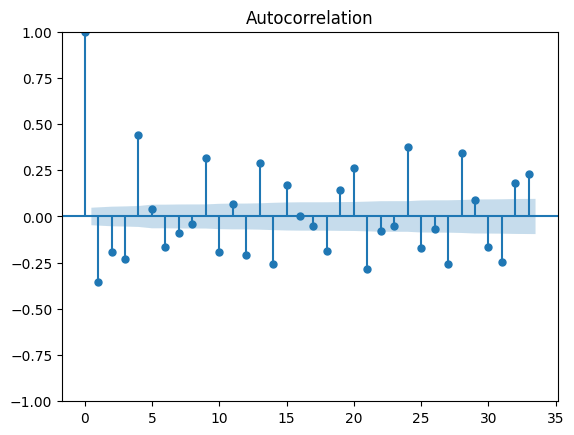

In [ ]:
plot_acf(first_diff)

## Plotting the PACF

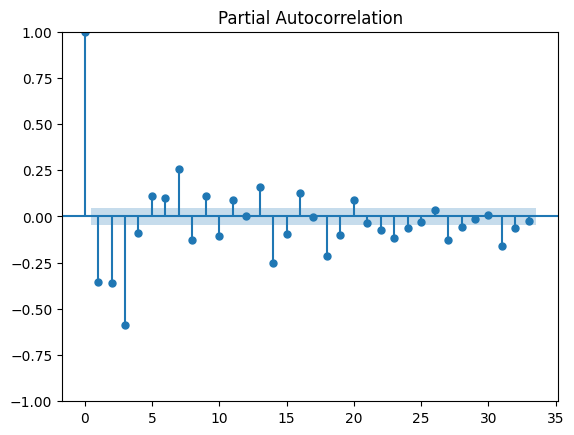

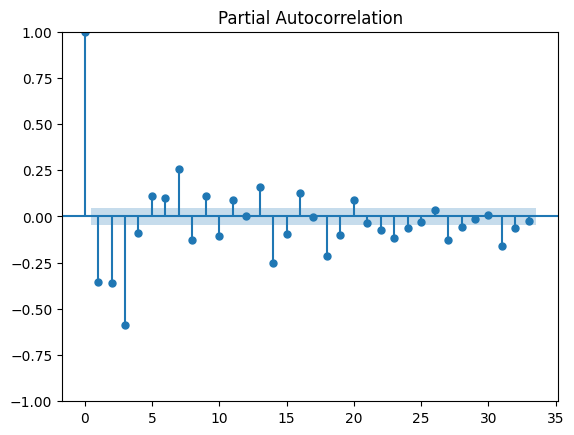

In [ ]:
plot_pacf(first_diff)

## Dividing the data into training and testing data

In [ ]:
train_data, test_data = temp[:1550], temp[1550:]

## Fitting the SARIMA model

In [ ]:
my_order = (0,1,1)
my_seasonal_order = (1,1,0,52)
model = SARIMAX(train_data, order = my_order, seasonal_order = my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                tavg   No. Observations:                 1550
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood               -2297.784
Date:                             Wed, 03 Jan 2024   AIC                           4601.569
Time:                                     14:29:20   BIC                           4617.503
Sample:                                          0   HQIC                          4607.505
                                            - 1550                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9304      0.009   -102.264      0.000      -0.948      -0.913
ar.S.L52      -0.2700      

## Calculating the forecasts

In [ ]:
predictions = model_fit.forecast(len(test_data))
results = pd.DataFrame(data={'Test data': test_data, 'Predictions': predictions})
print(results)

      Test data  Predictions
1600  29.228571    31.288154
1601  27.942857    28.658269
1602  28.028571    27.822526
1603  29.571429    28.749247
1604  27.828571    29.618221
...         ...          ...
1709  29.060000          NaN
1713  28.183333          NaN
1714  29.200000          NaN
1717  26.925000          NaN
1718  30.033333          NaN

[114 rows x 2 columns]


## Plotting the forecasts and test data graphically

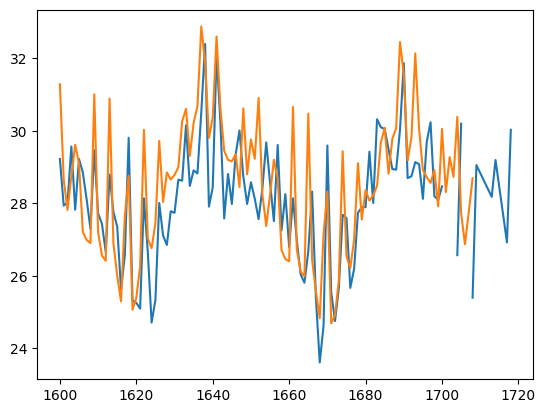

In [ ]:
plt.plot(results['Test data'])
plt.plot(results['Predictions'])